In [1]:
# 
import numpy as np
import matplotlib.pyplot as plt
import csv



In [2]:
############# Cargo los datos del los archivos en /datos/..
Za = list()
with open('./datos/Za.txt', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in spamreader:
        for a in row:
            Za.append(complex((''.join(a.split())).replace("i","j").replace(",",".")))
print(len(Za) )
            
            
fa = list()
with open('./datos/Fa.txt', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in spamreader:
        for a in row:
            fa.append(complex((''.join(a.split())).replace("i","j").replace(",",".")))

print(len(fa) )            
f    = np.array(fa[6400:6600]).real/2.5
Zant = np.array(Za)[6400:6600]


49001
49001


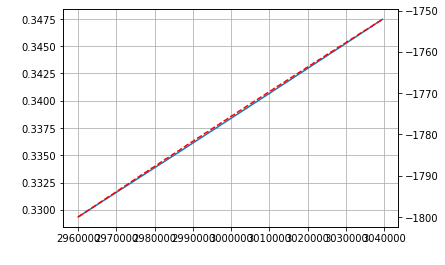

In [4]:
def PlotCpx(f,Z, labelx = ' ', labely = ' '):
    ax = plt.subplot(111)
    ax.grid(True)
    plt.ylabel(labely)
    plt.xlabel(labelx)
    ax.plot(f , (Z.real ) )
    ax2 = ax.twinx()
    ax2.plot(f ,Z.imag  , 'r--'    )
    
    
def PlotAry(f,Z, labelx = ' ', labely = ' '):
    ax = plt.subplot(111)
    ax.grid(True)
    plt.ylabel(labely)
    plt.xlabel(labelx)
    ax.plot(f , (Z ) )

       

### Plot Antena!

PlotCpx(f,Zant)
plt.show()

In [9]:
indice = 100
print('f  =  {:1.2e} Hz'.format(f[indice]) )

w    = 2*np.pi*f

# Datos para los calculos 
fo    = f[indice]
wo    = w[indice]
Rl    = Zant[indice].real
Ca    = -1/(Zant[indice].imag*wo)
rp    = 1
rg    = 50
Pdisp = 100

print('.param Rl =  {:1.2e} '.format(Rl) )
print('.param rg =  {:1.2e} '.format(rg) )
print('.param Ca  =  {:1.4e} '.format(Ca) )


## Etapa A

# Q de la antena 
Qa = 1/(wo*Ca*Rl)
# print(Qa)

# Neutralizo el capacitor
Xl = 1/(wo * Ca)         # reactancia de la antena 
La = Xl/wo               # neutraliza la reactancia de la antena 

# Etapa B
# Conversion serie-paralelo
Qm = ((rg/(Rl+rp)) -1)**0.5    # Calculo Qm necesario
#print(Qm)
XL  = Qm*(Rl+rp)            # L para lograr el Qm
Lb   = XL/wo
print('.param La  =  {:1.4e} '.format(La) )
print('.param Lb  =  {:1.4e} '.format(Lb) )
L = La + Lb
print('.param L  =  {:1.4e} '.format(L) )

#mean diameter of the coil    D = 200.0 mm
#number of turns              N = 26.0
#length of the coil           ℓ = 180.0 mm
#wire or tubing diameter      d = 3.0 mm
#design frequency             f = 3.0 MHz
#effective series inductance @ design frequency          L_eff_s = 9.433e-05 H
#effective series AC resistance @ design frequency       R_eff_s = 1.095e+00 Ω

print('.param rp =  {:1.2e} '.format(rp) )

XLp = XL*(1+1/Qm**2)

Cb   = 1/(XLp*wo)        # Capacitor sintonia 
print('.param Cb  =  {:1.4e} '.format(Cb) )
#https://www.knowlescapacitors.com/getattachment/ac79327c-78b2-4790-b841-4541dcd9a291/High-Power-RF
#http://datasheets.avx.com/HQ-Series.pdf
#effective series AC resistance @ design frequency       R_eff_s = 0.001 Ω

ig = ((Pdisp*8)/rg)**0.5

### Para simular con LTspice
print('.param ig =  {:1.2e} '.format(ig) )




f  =  3.00e+06 Hz
.param Rl =  3.38e-01 
.param rg =  5.00e+01 
.param Ca  =  2.9878e-11 
.param La  =  9.4199e-05 
.param Lb  =  4.2814e-07 
.param L  =  9.4627e-05 
.param rp =  1.00e+00 
.param Cb  =  6.3978e-09 
.param ig =  4.00e+00 


Zia  =  3.38e-01+0.00e+00j 


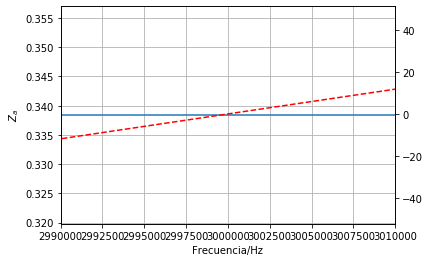

Zib  =  5.00e+01+4.38e-06j 


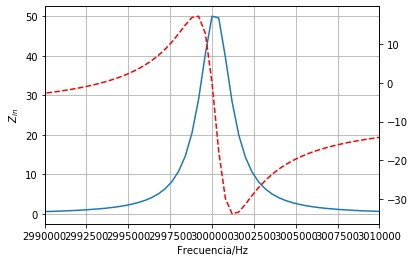

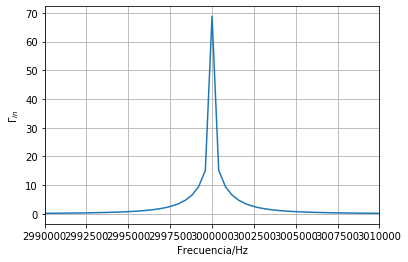

In [11]:
# Impedacias!
ZaC   =       1/(1j*w*Ca)
ZaL   =          1j*w*La  
ZbL   = rp  +    1j*w*Lb   
ZbC   = 1e-3+ 1/(1j*w*Cb)



##### CALCULOS Impedancias

##### Za
Zia   = ZaL + ZaC + Rl
print('Zia  =  {:1.2e} '.format(Zia[indice]) )

# Plot Za
PlotCpx(f,Zia , labelx = 'Frecuencia/Hz', labely = '$Z_{a}$')
plt.xlim([2.99e6, 3.01e6])
plt.show() 

##### Zb
Zib   = (ZbC*(Zia+ZbL))/(ZbC+Zia+ZbL)
print('Zib  =  {:1.2e} '.format(Zib[indice]) )
# Plot Zin
PlotCpx(f,Zib , labelx = 'Frecuencia/Hz', labely = '$Z_{in}$')
plt.xlim([2.99e6, 3.01e6])
plt.show() 

Gamma = (Zib-rg)/(Zib+rg)

# Plot Gamma
PlotAry(f,-20*np.log10(np.abs(Gamma ) ), labelx = 'Frecuencia/Hz', labely = '$\Gamma_{in}$')
plt.xlim([2.99e6, 3.01e6])
plt.show() 


In [12]:
## Voltage and current
print('ig  =  {:1.2f} '.format(ig) )
# Etapa B
vb   = ig * (rg*Zib)/(rg+Zib)
ib   = vb / Zib
print('Vb  =  {:1.2f} V'.format(abs(vb[indice]) ))
print('ib  =  {:1.2f} A'.format(abs(ib[indice]) ))

# Etapa A
ia   = vb  / (ZbL+Zia) 
va   = ia  * Zia
print('Va   =  {:4.2f} V'.format(abs(va[indice]) ))
print('ia   =  {:4.2f} A'.format(abs(ia[indice]) ))


vLa  = np.abs(ia)     * ZaL
pLa  = (np.abs(ia)**2  * (ZbL+ZaL) ).real /2
print('VLa  =  {:4.2f} V'.format(abs(vLa[indice]) ))
print('PLa  =  {:4.2f} W'.format(abs(pLa[indice]) ))

vCa  = ia  * ZaC  
print('VCa  =  {:4.2f} V'.format(abs(vCa[indice]) ))

# Salida
vo   = ia * Rl
print('Vo  =  {:1.2f} V'.format(abs(vo[indice]) ))


ig  =  4.00 
Vb  =  99.96 V
ib  =  2.00 A
Va   =  4.14 V
ia   =  12.22 A
VLa  =  21697.56 V
PLa  =  74.66 W
VCa  =  21697.56 V
Vo  =  4.14 V


PinB  =  100.00 W (50.00 dBm)


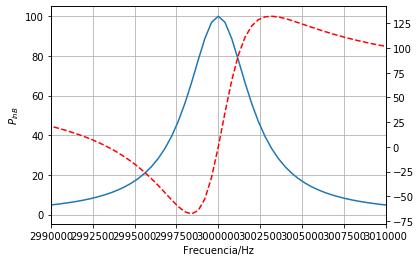

Gpb  =  0.25 (-5.97 dB) 


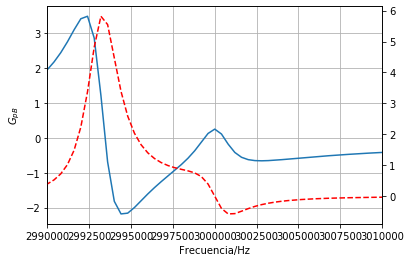

PinB  =  100.00 W (50.00 dBm)


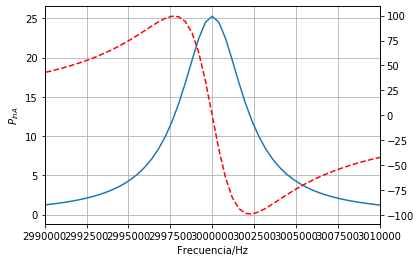

Gpa  =  1.00 (0.00 dB) 


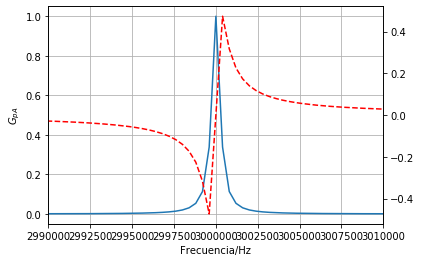

Po  =  25.26 W (44.03 dBm)


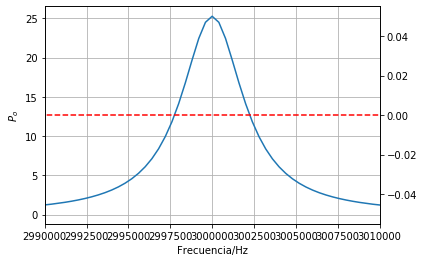

In [13]:
## Potencias


###### Etapa B
PinB = abs(vb)**2 /Zib/2 
print('PinB  =  {:1.2f} W ({:1.2f} dBm)'.format(abs(PinB[indice]) , 10*np.log10(abs(PinB[indice]/1e-3))))

# Plot Potencia entrada
PlotCpx(f,PinB , labelx = 'Frecuencia/Hz', labely = '$P_{inB}$')
plt.xlim([2.99e6, 3.01e6])
plt.show()  


Avb  = Zia /(Zia+ZbL)
Gpb   = abs(Avb)**2 * (Zib/Zia)
print('Gpb  =  {:1.2f} ({:1.2f} dB) '.format(abs(Gpb[indice]), 10*np.log10(abs(Gpb[indice]))))
PlotCpx(f,Gpb , labelx = 'Frecuencia/Hz', labely = '$G_{pB}$')
plt.xlim([2.99e6, 3.01e6])
plt.show()  



###### Etapa A
PinA = abs(va)**2 /Zia/2 
print('PinB  =  {:1.2f} W ({:1.2f} dBm)'.format(abs(PinB[indice]) , 10*np.log10(abs(PinB[indice]/1e-3))))

# Plot Potencia entrada
PlotCpx(f,PinA , labelx = 'Frecuencia/Hz', labely = '$P_{inA}$')
plt.xlim([2.99e6, 3.01e6])
plt.show()  


Ava  = Rl /(ZaL+ZaC+Rl)
Gpa   = abs(Ava)**2 * (Zia/Rl)
print('Gpa  =  {:1.2f} ({:1.2f} dB) '.format(abs(Gpa[indice]), 10*np.log10(abs(Gpa[indice]))))
PlotCpx(f,Gpa , labelx = 'Frecuencia/Hz', labely = '$G_{pA}$')
plt.xlim([2.99e6, 3.01e6])
plt.show()  



####### Potencia de salida
Po = abs(vo)**2 /Rl/2 
print('Po  =  {:1.2f} W ({:1.2f} dBm)'.format(abs(Po[indice]) , 10*np.log10(abs(Po[indice]/1e-3))))

# Plot Potencia entrada
PlotCpx(f,Po , labelx = 'Frecuencia/Hz', labely = '$P_{o}$')
plt.xlim([2.99e6, 3.01e6])
plt.show()  

